# RNN/LSTM - a gentle introduction

In this note we want to explore the fitting capabilities of the RNN and LSTM model utilizing a simple timeseries of a noisy sine function which besides the longer period of the sine itself has a periodic bias at t+10 that is added to the function.

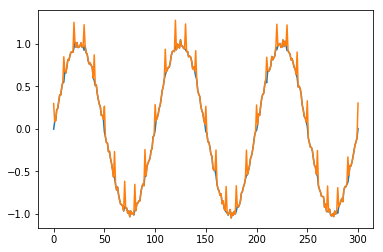


# 1. Model definitions and model inputs

To implement our model in tensorflow, we need to specify the model window size, we will call __maxlen__ in the code below. The model will then take the past $\bar{y}_{t - \text{maxlen} - 1 - w_x:t-1}$ datapoints as inputs and try to predict the next period $y_t$. 

## 1a. How to select an appropriate Initialization?


Let us assume we have 20 hidden dimensions and we defined as 
```
tf.contrib.rnn.LSTMCell(20, forget_bias=1.0, use_peepholes=True)
```
This will define some variables automatically, which we can inspect with the command below
```
tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
```
for which we get the output
```
[<tf.Variable 'V:0' shape=(20,) dtype=float32_ref>,
 <tf.Variable 'b:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'lstm_cell/kernel:0' shape=(21, 80) dtype=float32_ref>,
 <tf.Variable 'lstm_cell/bias:0' shape=(80,) dtype=float32_ref>,
 <tf.Variable 'lstm_cell/w_f_diag:0' shape=(20,) dtype=float32_ref>,
 <tf.Variable 'lstm_cell/w_i_diag:0' shape=(20,) dtype=float32_ref>,
 <tf.Variable 'lstm_cell/w_o_diag:0' shape=(20,) dtype=float32_ref>]
```
which apriori is not that straight forward to understand. Lets look at the source code. Looking into the source code of the file rnn_cell_impl.py where the class LSTMCell is defined we see

```python
self._kernel = self.add_variable(
        _WEIGHTS_VARIABLE_NAME,
        shape=[input_depth + h_depth, 4 * self._num_units],
        initializer=self._initializer,
        partitioner=maybe_partitioner)
```
where `_num.units` stands for the first argument of LSTMCell, and
`h_depth = self._num_units`. The member variable `self._initializer` is passed as an initial argument